#  Deep Learning and Image Recognition

## Classification of IRIS dataset using Scikit-Learn 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets,metrics
#draw plots in the browser
%matplotlib inline 

### IRIS data set
#### https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg", width=200, height=200)

In [3]:
# import Iris dataset from Scikit-Learn's datasets
iris = datasets.load_iris()

print ("Shape of the data ", iris.data.shape)
print ("Shape of the data ", iris.target_names)
print ("Attributes ", iris.feature_names)

#view first 5 rows
print (iris.data[range(5)])
print (iris.target[range(5)])

Shape of the data  (150, 4)
Shape of the data  ['setosa' 'versicolor' 'virginica']
Attributes  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [4]:
#show it as a table
df = pd.DataFrame(data=iris.data)
df.columns = [iris.feature_names]
df['Class'] = iris.target
df['Name'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

### Generate Model

In [6]:
#Logistic Regression
logreg = linear_model.LogisticRegression(C=1e5)

#fit all the data into the classifier
logreg.fit(X, Y)

#output the classifiers prediction
predicted = logreg.predict(X)

### Predict

In [7]:
df['Predicted'] = predicted
df['Predicted Name'] = iris.target_names[predicted]
#df.head()
df.tail() #end of the data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Name,Predicted,Predicted Name
145,6.7,3.0,5.2,2.3,2,virginica,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica,1,versicolor
147,6.5,3.0,5.2,2.0,2,virginica,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica,1,versicolor


### Plot decision boundaries

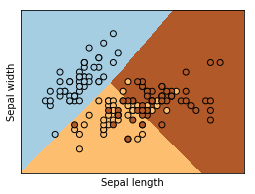

In [8]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Plot confusion matrix

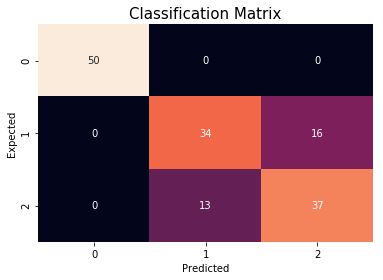

In [9]:
confusion_matrix =  pd.crosstab(index=iris.target, columns=predicted.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Classification Matrix", fontsize = 15)
plt.show()

### Classification Report

In [10]:
print (metrics.classification_report(iris.target,predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.72      0.68      0.70        50
          2       0.70      0.74      0.72        50

avg / total       0.81      0.81      0.81       150



## <span style="color:cornflowerblue">Exercise:</span>

1. Use code below to split data into train with 70% and test with 30% of the data. Then plot classification matrix using any two other classifiers and compare performance with the Logistic Regression Classifier. Here is list of available classifiers  http://scikit-learn.org/stable/supervised_learning.html#supervised-learning 

2. Write a resusable function that take in any number of classifiers and produces a confusion matrix, accuracy score and other useful metrics about the classification.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


In [12]:
#Logistic Regression
logreg = linear_model.LogisticRegression(C=1e5)

#fit all the data into the classifier
logreg.fit(X_train, y_train)

#output the classifiers prediction
predicted = logreg.predict(X_test)

In [13]:
predicted

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [14]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])